# IBL data in the NWB format

## IBL data on dandi archive

All IBL data released as part of the Brain-wide map project will be converted to NWB format. The IBL dataset can be found on the Dandi archive [here](https://dandiarchive.org/dandiset/000409).

## Differences between NWB and ONE

**NWB**


*   All data packaged in one large data file

**ONE**

*   Data stored as individual files



# Installing NWB

## Installing relevant packages for NWB

In [ ]:
!pip install fsspec
!pip install h5py
!pip install pynwb
!pip install ibllib
!pip install aiohttp
!pip install dandi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 24.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Replicating ONE examples with NWB

## Example 1: Characterising the reaction time of the subject in a session

1.   Load in trials data for a particular session using NWB
2.   Explore the trials object
3.   Compute the reaction time for each trial in the session
4.   Compute whether there are differences in reaction time depending on trial type (left vs right stimulus, correct vs incorrect trial)
5.   Plot the reaction time across the duration of the session



In [ ]:
# 1. Load/stream trials data with nwb

import fsspec
import h5py
import pandas as pd
import numpy as np
from fsspec.implementations.cached import CachingFileSystem
from pynwb import NWBHDF5IO
from dandi.dandiapi import DandiAPIClient

# get S3 URL for NWB file on DANDI
dandiset_id = '000409'
filepath = 'sub-CSH-ZAD-001/sub-CSH-ZAD-001_ses-3e7ae7c0-fe8b-487c-9354-036236fa1010_behavior+ecephys+image.nwb'
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(filepath)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

cache_dir = "/tmp/fsspec_cache" # Local folder for the cache

# configure CachingFileSystem for streaming
cfs = CachingFileSystem(
  fs=fsspec.filesystem("http"),
  cache_storage=cache_dir,
)
file_system = cfs.open(s3_url, "rb")
file = h5py.File(file_system)
io = NWBHDF5IO(file=file, load_namespaces=True)

nwb = io.read()
trials = nwb.trials.to_dataframe()

/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [ ]:
# 2. Explore the trials object

# Find the keys in our object
keys = trials.keys()

# Display the trials table
from IPython.display import display # import module to display dataframe nicely
display(trials)

,start_time,stop_time,choice,feedback_type,reward_volume,contrast_left,contrast_right,probability_left,feedback_time,response_time,stim_off_time,stim_on_time,go_cue_time,first_movement_time
id,,,,,,,,,,,,,,
0,89.422024,92.274432,-1.0,1.0,1.5,NaN,0.2500,0.5,90.701429,90.701327,91.774322,90.157550,90.068459,90.505466
1,92.666332,96.874214,1.0,1.0,1.5,1.0000,NaN,0.5,95.307402,95.307320,96.374128,94.773188,94.774055,94.879466
2,97.222010,101.707428,1.0,1.0,1.5,1.0000,NaN,0.5,100.138518,100.138420,101.207345,99.789720,99.790687,99.897466
3,102.055827,105.739622,-1.0,1.0,1.5,NaN,1.0000,0.5,104.184614,104.184523,105.239542,103.806118,103.806952,103.956466
4,106.131419,110.322831,1.0,-1.0,0.0,NaN,0.0625,0.5,107.767889,107.767323,109.822783,107.324000,107.324900,107.227466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,4414.557933,4417.251457,-1.0,1.0,1.5,NaN,0.2500,0.2,4415.677455,4415.677343,4416.751347,4415.183737,NaN,NaN
850,4418.245665,4443.284356,-1.0,1.0,1.5,NaN,0.0000,0.2,4441.716484,4441.716355,4442.784277,4418.816941,4418.817641,4425.446466
851,4444.349454,4447.017480,1.0,1.0,1.5,1.0000,NaN,0.8,4445.444278,4445.444164,4446.517404,4445.099846,4445.100645,4445.177466


In [ ]:
# 3. Compute reaction time
# Define reaction time as the time when the visual stimulus first appears and detected response time
# NOTE: Some key values will be slightly different in NWB than what was seen previously
reaction_time = trials['response_time'] - trials['stim_on_time']

In [ ]:
# 4. Evaluate reaction time across different trial types
# Compare reaction time for left vs right trials
left_trial_idx = ~np.isnan(trials['contrast_left'])
right_trial_idx = ~np.isnan(trials['contrast_right'])
left_reaction_time = np.mean(reaction_time[left_trial_idx])
right_reaction_time = np.mean(reaction_time[right_trial_idx])
print(f'Average reaction time for stimulus on')
print(f'Left: {left_reaction_time}')
print(f'Right: {right_reaction_time}')

# Compare reaction time for correct vs incorrect trials
correct_trial_idx = trials['feedback_type'] == 1
incorrect_trial_idx = trials['feedback_type'] == -1
correct_reaction_time = np.mean(reaction_time[correct_trial_idx])
incorrect_reaction_time = np.mean(reaction_time[incorrect_trial_idx])
print(f'\nAverage reaction time for trials that were')
print(f'Correct: {correct_reaction_time}')
print(f'Incorrect: {incorrect_reaction_time}')

Average reaction time for stimulus on
Left: 0.9144018451232288
Right: 1.6405780232319933

Average reaction time for trials that were
Correct: 0.8682564650152387
Incorrect: 3.936135892903635


Text(0, 0.5, 'Reaction time (s)')

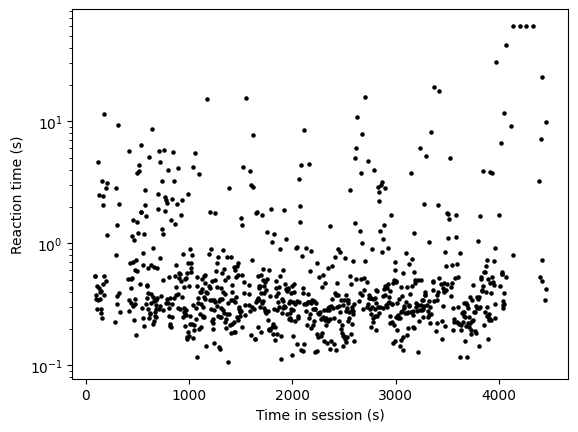

In [ ]:
# 5. Make plot of reaction time across session
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(trials['stim_on_time'], reaction_time, c='k', s=5)
ax.set_yscale('log')
ax.set_xlabel('Time in session (s)')
ax.set_ylabel('Reaction time (s)')

## Example 4: Characterising event aligned activity of wheel velocity and paw position

In this example we will show how to

1.   Load in trials, wheel and pose data
2.   Smoothing the wheel trace


In [ ]:
import fsspec
import h5py
import pandas as pd
import numpy as np
from fsspec.implementations.cached import CachingFileSystem
from dandi.dandiapi import DandiAPIClient

# get S3 URL for NWB file on DANDI
dandiset_id = '000409'
filepath = 'sub-CSH-ZAD-001/sub-CSH-ZAD-001_ses-3e7ae7c0-fe8b-487c-9354-036236fa1010_behavior+ecephys+image.nwb'
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(filepath)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

cache_dir = "/tmp/fsspec_cache" # Local folder for the cache

# configure CachingFileSystem for streaming
cfs = CachingFileSystem(
  fs=fsspec.filesystem("http"),
  cache_storage=cache_dir,
)
file_system = cfs.open(s3_url, "rb")
file = h5py.File(file_system)
io = NWBHDF5IO(file=file, load_namespaces=True)

# 1. Load/stream nwb data, convert to Pandas DataFrame
nwb = io.read()
trials = nwb.trials.to_dataframe()

wheel_raw_position = nwb.processing["behavior"].containers["CompassDirection"].spatial_series["WheelPositionSeries"].data
wheel_raw_timestamps = nwb.processing["behavior"].containers["CompassDirection"].spatial_series["WheelPositionSeries"].timestamps


/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.6.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.3.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Text(0, 0.5, 'Acceleration')

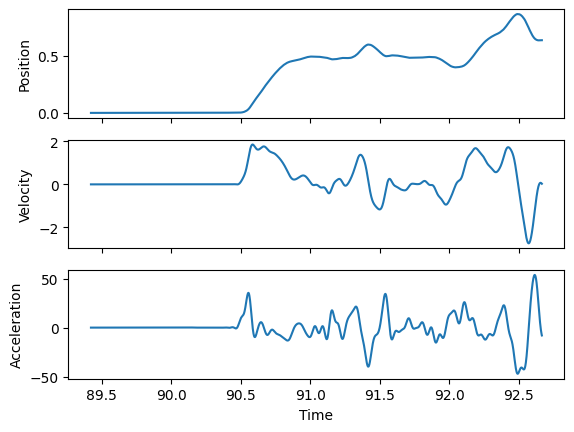

In [ ]:
# 2. Smooth the wheel trace, calculate the velocity and acceleration

t0 = trials['start_time']
t1 = trials['stop_time']

# Compute position, velocity, acceleration from the raw wheel data
from brainbox.behavior.wheel import interpolate_position, velocity_filtered
wheel = pd.DataFrame(columns=['times', 'position', 'velocity', 'acceleration'])
wheel['position'], wheel['times'] = interpolate_position(wheel_raw_timestamps, wheel_raw_position, freq=1000)
wheel['velocity'], wheel['acceleration'] = velocity_filtered(wheel['position'], fs=1000, corner_frequency=20, order=8)
wheel = wheel.apply(np.float32)
idx = np.searchsorted(wheel['times'], np.r_[t0, t1])

# Generate graphs
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(wheel['times'][idx[0]:idx[1]], wheel['position'][idx[0]:idx[1]] - wheel['position'][idx[0]]) # subtract first position point
axs[0].set_ylabel('Position')
axs[1].plot(wheel['times'][idx[0]:idx[1]], wheel['velocity'][idx[0]:idx[1]])
axs[1].set_ylabel('Velocity')
axs[2].plot(wheel['times'][idx[0]:idx[1]], wheel['acceleration'][idx[0]:idx[1]])
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Acceleration')

# Useful Resources


* [IBL NWB brain-wide map data](https://dandiarchive.org/dandiset/000409)
* [PyNWB documentation](https://pynwb.readthedocs.io/en/stable/index.html)
* [NWB Widgets](https://github.com/NeurodataWithoutBorders/nwbwidgets)
